# Question 10: Is there a correlation between a player's height and their ranking
---
## **Overview**
The question I set out to answer was: "Is there a correlation between a player's height and their ranking?"
This question aims to determine if a player's physical attribute—height—is statistically related to their current ranking on the tour. Since lower ranking values generally imply better performance, understanding this relationship may provide insights into any potential physical advantages.

## **Data Selection & Approach**

- **Data Source:**
I used the **matches_df** dataset because it contains the columns `height` (player's height) and `current_rank` (player's ranking).

- **Data Preparation:**
I filtered the dataset to retain only rows where both height and current_rank values are available.

- **Analytical Methods**

1. Scatter Plot: To visually inspect the relationship between player height and ranking, I plotted a scatter chart.

2. Correlation Coefficient: I computed the Pearson correlation coefficient between height and current_rank to quantify the relationship.

**Note:** Since a lower ranking number indicates a better rank, a negative correlation would suggest that taller players tend to have better (lower-numbered) rankings, whereas a positive correlation would indicate that taller players tend to have worse rankings.


In [1]:
import os
from pathlib import Path
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def get_day_folders(base_path):
    return sorted([
        folder for folder in os.listdir(base_path)
        if os.path.isdir(os.path.join(base_path, folder)) and folder.startswith("2024")
    ])

def load_file_selected_columns(file, columns):
    try:
        return pd.read_parquet(file, columns=columns)
    except Exception as e:
        return None

def load_file_selected_columns(file, columns):
    try:

        df = pd.read_parquet(file)
        
        # Check which columns exist in the file
        existing_columns = [col for col in columns if col in df.columns]
        
        # If no required columns exist, skip this file
        if not existing_columns:
            return None
        
        # Select the existing columns and return the dataframe
        return df[existing_columns]
        
    except Exception as e:
        print(f"⚠️ Error reading {file}: {e}")
        return None

def load_all_data_selected_columns(base_path, subfolder_name, columns):
    all_files = []
    for folder in get_day_folders(base_path):
        path_pattern = Path(base_path) / folder / 'data' / 'raw' / subfolder_name
        all_files.extend(path_pattern.glob("*.parquet"))

    dfs = []
    failed_files = 0
    success_files = 0

    with ThreadPoolExecutor(max_workers=16) as executor:
        futures = [executor.submit(load_file_selected_columns, file, columns) for file in all_files]
        for future in tqdm(as_completed(futures), total=len(futures), desc="Loading selected columns"):
            result = future.result()
            if result is not None:
                dfs.append(result)
                success_files += 1
            else:
                failed_files += 1

    print(f"✔️ Successfully loaded {success_files} files.")
    print(f"⚠️ Skipped {failed_files} files due to missing columns.")

    return pd.concat(dfs, ignore_index=True) if dfs else None

In [3]:
base_path = "../data/tennis_data"
required_stats_columns = ['match_id', 'player_id', 'current_rank', 'height']
matches_df = load_all_data_selected_columns(base_path, 'raw_match_parquet', required_stats_columns)

Loading selected columns: 100%|██████████| 316802/316802 [10:36<00:00, 497.63it/s]


✔️ Successfully loaded 316802 files.
⚠️ Skipped 0 files due to missing columns.


C:\Users\fatii\AppData\Local\Temp\ipykernel_7920\2733053968.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(dfs, ignore_index=True) if dfs else None


In [4]:
matches_df.head()

,match_id,player_id,current_rank,height
0,11999005,62404.0,286.0,1.93
1,11999211,69500.0,257.0,1.88
2,11999004,235576.0,89.0,1.88
3,11998445,192013.0,30.0,1.93
4,11999210,377489.0,410.0,1.91


In [9]:
cleaned_df = matches_df[['height', 'current_rank']].dropna()
correlation = cleaned_df['height'].corr(cleaned_df['current_rank'])
print("Pearson correlation coefficient between height and current rank:", correlation)

Pearson correlation coefficient between height and current rank: 0.07834513388031811


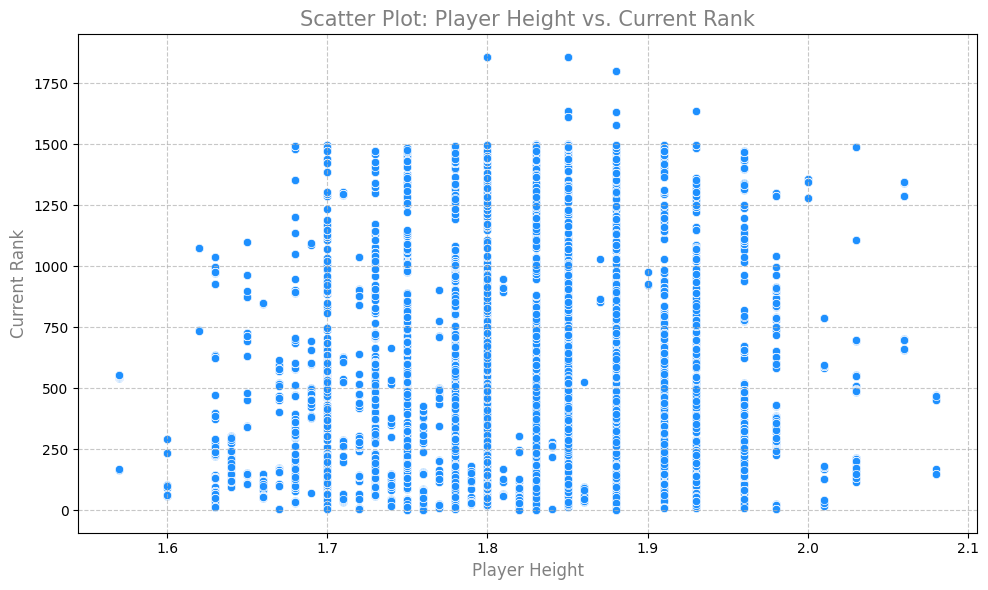

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_df, x='height', y='current_rank', color='dodgerblue')
plt.title("Scatter Plot: Player Height vs. Current Rank", fontsize=15, color="grey")
plt.xlabel("Player Height", fontsize=12, color="grey")
plt.ylabel("Current Rank", fontsize=12, color="grey")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("../outputs/figures/PlayerHeightVsRank.png", dpi=300)
plt.show()

# **Conclusion**

**Pearson Correlation Coefficient:**
The calculated value was `0.078`.

This value is very close to zero, indicating that there is no strong linear correlation between a player's height and their current ranking. In other words, being taller does not significantly predict a better or worse rank.

- A positive correlation means that as height increases, rank tends to get worse (since higher numbers are worse ranks).
- But in this case, 0.078 is so small that the relationship is effectively negligible.

From this analysis, I concluded that player height has little to no correlation with current ranking.
This suggests that factors like skill, experience, mental strength, and strategy are likely much more influential in determining rank than height alone.